## 1. Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

ModuleNotFoundError: No module named 'sklearn'

## 2. Loading dataset

In [2]:
def load_dataset():
    url = "https://storage.googleapis.com/qwasar-public/track-ds/boston.csv"
    dataset = pd.read_csv(url)
    return dataset

In [3]:
boston_dataframe = load_dataset()

In [4]:
print(boston_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MDEV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

## 3. Printing summary of the dataset

In [5]:
def print_summarize_dataset(dataset):
    print("Dataset dimension:")
    print(dataset.shape)
    print("First 10 rows of dataset:")
    print(dataset.head(10))
    print("Statistical summary:")
    print(dataset.describe())

In [6]:
print_summarize_dataset(boston_dataframe)

Dataset dimension:
(506, 14)
First 10 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  MDEV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  3

## 4. Cleaning and Pre-processing

In [7]:
def clean_dataset(boston_dataframe):
    boston_dataframe.dropna(inplace=True)

In [8]:
clean_dataset(boston_dataframe)

## 5. Data Analysis

In [9]:
# Plotting each attribute in a histogram
def print_histograms(boston_dataframe):
    boston_dataframe.hist(layout=(4,4), bins=50, figsize=(14,10))
    plt.show()

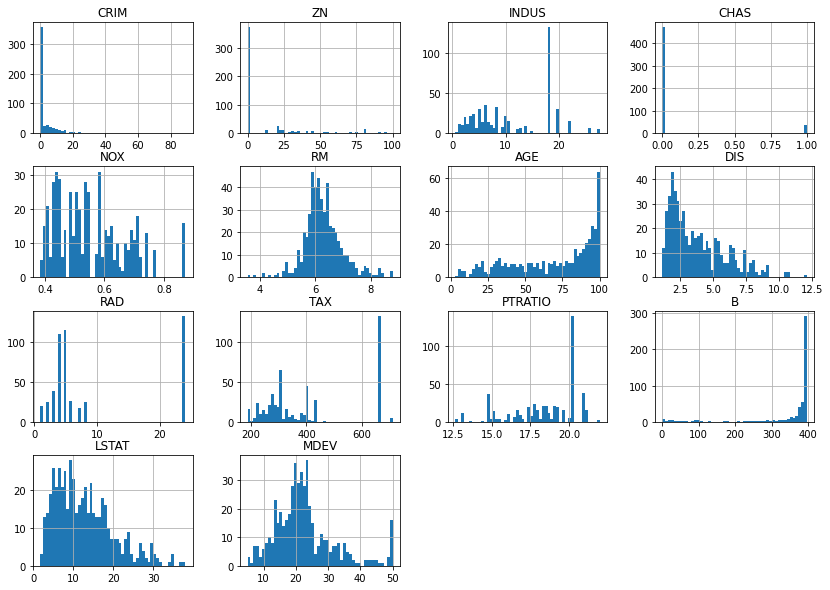

In [10]:
print_histograms(boston_dataframe)

In [11]:
# Function that computes correlations matrix of dataset
def compute_correlations_matrix(boston_dataframe):
    corr_matrix = boston_dataframe.corr()
    #corr_dict = {}
    #for i in corr_matrix.columns:
    #    corr_dict[f'{i}'] = corr_matrix.loc[f'{i}']
    return corr_matrix

In [12]:
correlations = compute_correlations_matrix(boston_dataframe)
print(correlations['MDEV'])

CRIM      -0.385832
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MDEV       1.000000
Name: MDEV, dtype: float64


In [13]:
# Plotting scatter matrix
def print_scatter_matrix(boston_dataframe):
    pd.plotting.scatter_matrix(boston_dataframe, figsize=(14,10))

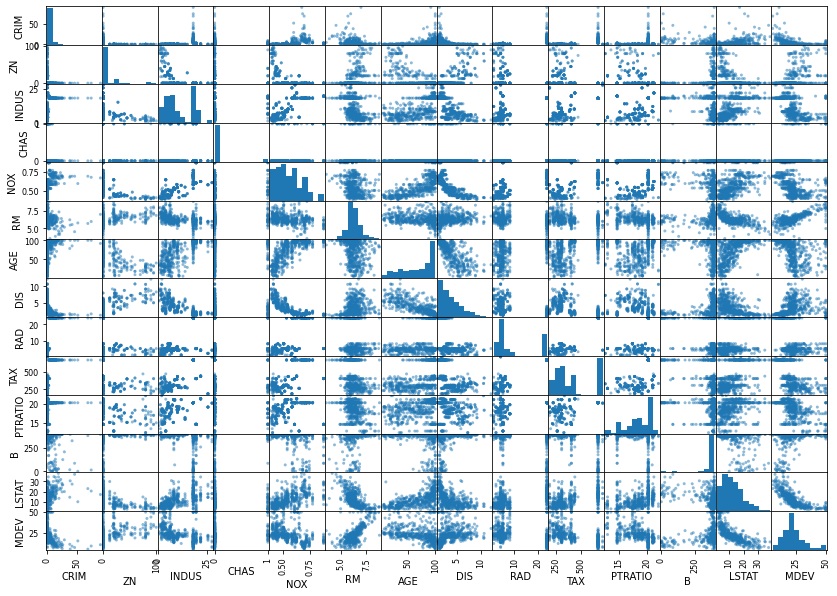

In [14]:
print_scatter_matrix(boston_dataframe)

<AxesSubplot:xlabel='RM', ylabel='MDEV'>

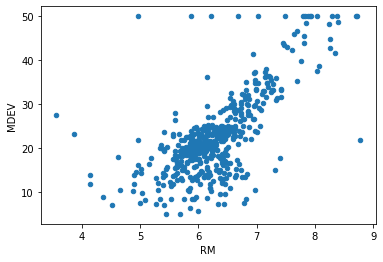

In [16]:
# Plotting MDEV in function of RM
boston_dataframe.loc[:,['RM','MDEV']].plot.scatter(x='RM', y='MDEV')

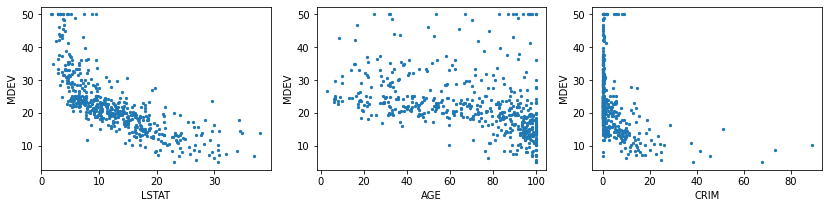

In [17]:
# Plotting MDEV as a function of LSTAT, AGE, and CRIME
features = ['LSTAT', 'AGE', 'CRIM']
fig, axes = plt.subplots(1,3)
for i in range(3):
    boston_dataframe.loc[:,[f'{features[i]}','MDEV']].plot.scatter(x=f'{features[i]}', y='MDEV', s=5, figsize=(14,3), ax=axes[i])

In [18]:
# Printing the correlation coefficients for LSTAT
print(correlations['LSTAT'])

CRIM       0.452220
ZN        -0.412995
INDUS      0.603800
CHAS      -0.053929
NOX        0.590879
RM        -0.613808
AGE        0.602339
DIS       -0.496996
RAD        0.488676
TAX        0.543993
PTRATIO    0.374044
B         -0.366087
LSTAT      1.000000
MDEV      -0.737663
Name: LSTAT, dtype: float64


## 6. Prediction